In [1]:
import torch
import torch as t
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer
import os

In [2]:
print(torch.cuda.is_available())

True


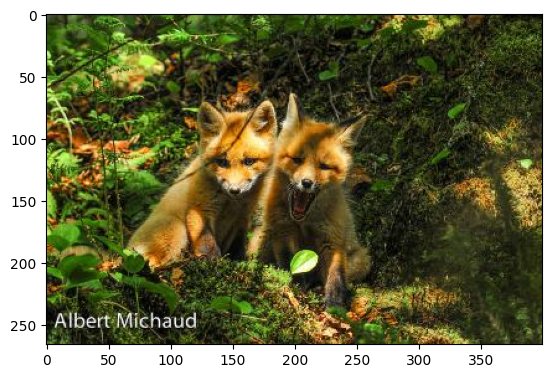

In [21]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = plt.imread('./CAMO-V.1.0/Images/Train/camourflage_00001.jpg')
plt.imshow(img)

# Extracting edges of image and storing them

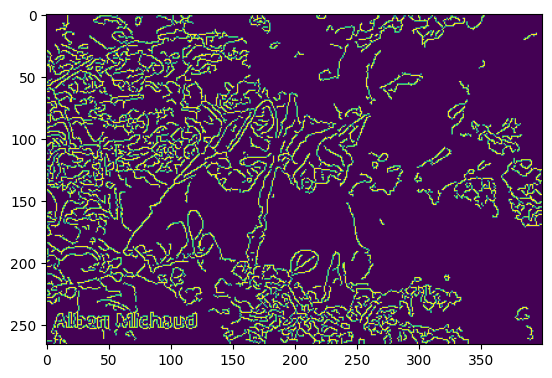

In [22]:
img_blur = cv2.GaussianBlur(img, (5, 5), 0)
edges = cv2.Canny(img_blur, threshold1=100, threshold2=200)
plt.imshow(edges)

In [34]:
import os 
train_dirs = os.listdir('./CAMO-V.1.0/Images/Train')
train_dirs

['camourflage_00001.jpg',
 'camourflage_00002.jpg',
 'camourflage_00003.jpg',
 'camourflage_00004.jpg',
 'camourflage_00005.jpg',
 'camourflage_00006.jpg',
 'camourflage_00007.jpg',
 'camourflage_00008.jpg',
 'camourflage_00009.jpg',
 'camourflage_00010.jpg',
 'camourflage_00011.jpg',
 'camourflage_00013.jpg',
 'camourflage_00014.jpg',
 'camourflage_00015.jpg',
 'camourflage_00016.jpg',
 'camourflage_00019.jpg',
 'camourflage_00020.jpg',
 'camourflage_00021.jpg',
 'camourflage_00022.jpg',
 'camourflage_00023.jpg',
 'camourflage_00024.jpg',
 'camourflage_00025.jpg',
 'camourflage_00026.jpg',
 'camourflage_00027.jpg',
 'camourflage_00028.jpg',
 'camourflage_00029.jpg',
 'camourflage_00030.jpg',
 'camourflage_00031.jpg',
 'camourflage_00032.jpg',
 'camourflage_00033.jpg',
 'camourflage_00035.jpg',
 'camourflage_00036.jpg',
 'camourflage_00037.jpg',
 'camourflage_00038.jpg',
 'camourflage_00039.jpg',
 'camourflage_00040.jpg',
 'camourflage_00041.jpg',
 'camourflage_00042.jpg',
 'camourflag

In [36]:
#applying canny filters and storing the images
for i in train_dirs:
    img = plt.imread('./CAMO-V.1.0/Images/Train/'+i)
    img_blur = cv2.GaussianBlur(img, (5, 5), 0)
    edges = cv2.Canny(img_blur, threshold1=100, threshold2=200)
    plt.imsave('./CAMO-V.1.0/Canny_Filtered_images/'+i,edges,cmap='gray')

## Extracting Mask boundary from the images

0


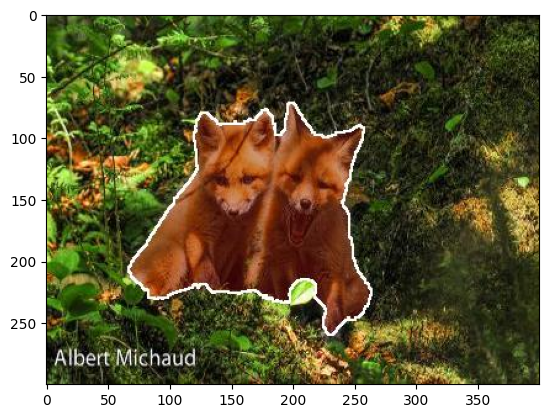

In [16]:

#img = Image.open('C:\\Users\\A1D\\Desktop\\CAMO IMG DETECTION\\Temp_data\\Style1 Mask\\camourflage_00001.jpg').convert('L')
img = plt.imread('./Temp_data/Style1 Mask/camourflage_00001.jpg')
#img = cv2.imread('C:\\Users\\A1D\\Desktop\\CAMO IMG DETECTION\\Temp_data\\Style1 Mask\\camourflage_00001.jpg', cv2.IMREAD_GRAYSCALE)
arr = np.array(img)
#plt.get_cmapt('gray')
print(min(arr.flatten()))
plt.imshow(arr,plt.get_cmap('gray'))

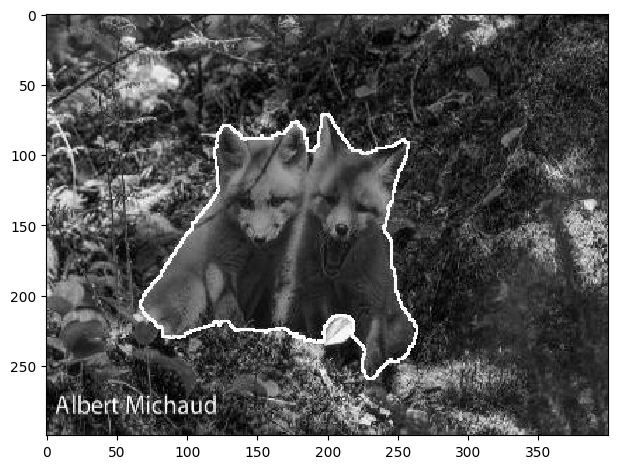

max val: 1.0
6
[[0.31906941 0.33811176 0.33671294 ... 0.05433647 0.03137255 0.01960784]
 [0.33811176 0.34987647 0.34006902 ... 0.03696863 0.02296392 0.01904235]
 [0.34681098 0.34512941 0.31989569 ... 0.07925765 0.06749294 0.06749294]
 ...
 [0.35908235 0.28514588 0.25575333 ... 0.17778863 0.27022471 0.26965922]
 [0.47533843 0.414      0.41990157 ... 0.19404039 0.29151412 0.27022471]
 [0.51539529 0.40588196 0.37144392 ... 0.19796196 0.29935725 0.26014157]]


In [38]:
from skimage import io, color

# Read the image as grayscale
gray_image = color.rgb2gray(io.imread('./Temp_data/Style1 Mask/camourflage_00001.jpg'))

# Display the grayscale image
io.imshow(gray_image)
io.show()

arr = np.array(gray_image)
print("max val:",max(arr.flatten()))
print(np.count_nonzero(arr == 1.0))
print(arr)

(300, 400)
(300, 400)
image flatten:  120000


/home/hassan/.local/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


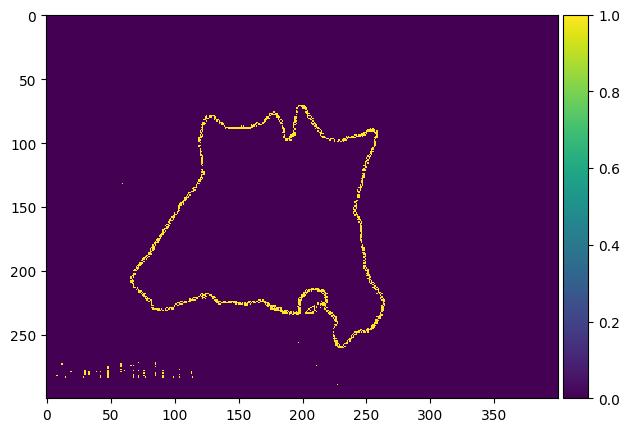

In [5]:
print(arr.shape)
#arr2 = arr[arr!=0] 
arr2 = np.where(arr<0.97 ,0,1)
print(arr2.shape)
print("image flatten: ", len(arr2.flatten()))
io.imshow(arr2)

# Saving new masks

In [39]:
import os
from PIL import Image
Dir = os.listdir('./CAMO-V.1.0/Images/Train')
for i in Dir:
    gray_image = color.rgb2gray(io.imread('./CAMO-V.1.0/Overlaid_Mask/style1/'+i))
    arr = np.array(gray_image)
    arr2 = np.where(arr<0.97 ,0,1)
    #io.imshow(arr2)
    plt.imsave('./CAMO-V.1.0/new_masks/'+i, arr2, cmap='gray')
                                          
    

In [54]:
temp = plt.imread('./CAMO-V.1.0/Canny_Filtered_images/camourflage_00001.jpg')

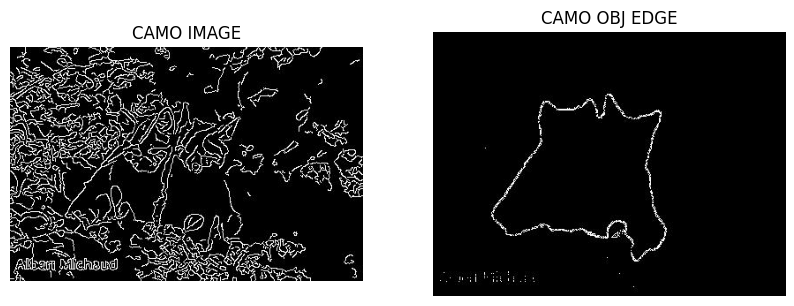

In [56]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# load images
img1 = mpimg.imread('./CAMO-V.1.0/Canny_Filtered_images/camourflage_00001.jpg')
img2 = mpimg.imread('./CAMO-V.1.0/new_masks/camourflage_00001.jpg')

# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# display images on subplots
ax1.imshow(img1)
ax1.set_title('CAMO IMAGE')
ax1.axis('off')

ax2.imshow(img2)
ax2.set_title('CAMO OBJ EDGE')
ax2.axis('off')

# show the plot
plt.show()


In [4]:
#camourflage_00001
def name(val):
    digits = len(str(val))
    z = '0' * (5-digits)
    no = z + str(val)
    return 'camourflage_' + no

name(10)

'camourflage_00010'

# DataLoader

In [78]:
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform

    def __len__(self):
        #return len(self.text_list)
        return 1000
        
    def __getitem__(self, idx):
        # load image and convert to RGB
        name = train_dirs[idx]
        img_path = os.path.join(self.image_dir, name)
        image = Image.open(img_path).convert('RGB')
        
        mask_path = os.path.join(self.mask_dir, name)
        mask = Image.open(mask_path)

        #transform = transforms.Compose([transforms.PILToTensor()])
        transform = transforms.Compose([transforms.Resize((150,150)), transforms.ToTensor()])


        # transform = transforms.PILToTensor()
        # Convert the PIL image to Torch tensor
        
        image = transform(image)
        image = torch.tensor(image)
        image = torch.flatten(image)
        
        
        #transforming mask
        mask = transform(mask)
        mask = torch.tensor(mask)
        mask = torch.flatten(mask)
        
        if len(mask) == 22500:
            mask = torch.nn.functional.pad(mask, (0, 45000), mode='constant', value=0)  # shape: [1, 7500]

        
        #print('img len:', len(image), ' mask len:',len(mask))


        # return the sample as a dictionary
        sample = {'image': image,  'mask':mask}
        return sample

# Example usage
#image_dir = "./memotion_dataset_7k/images"
image_dir = r'./CAMO-V.1.0/Canny_Filtered_images/'
mask_dir = r'./CAMO-V.1.0/new_masks/'

dataset = MyDataset(image_dir, mask_dir, transform=None)
dataloader = DataLoader(dataset, batch_size=5, shuffle=True)


In [79]:
import torch.nn as nn
import torch.nn.functional as F

'''class MaskMaker(nn.Module):
    def __init__(self):
        super(MaskMaker, self).__init__()
        
        self.conv1 = nn.Conv1d(5, 30000, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(30000, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv1d(128, 5, kernel_size=3, padding=1)         
        
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 16 * 16, 512)
        self.fc2 = nn.Linear(512, 256)


    def forward(self, image):
        x1 = self.conv1(image)
        x1 = F.relu(x1)
        x1 = self.pool(x1)

        x1 = self.conv2(x1)
        x1 = F.relu(x1)
        x1 = self.pool(x1)

        x1 = self.conv3(x1)
        x1 = F.relu(x1)
        x1 = self.pool(x1)

        
        return x1'''


'class MaskMaker(nn.Module):\n    def __init__(self):\n        super(MaskMaker, self).__init__()\n        \n        self.conv1 = nn.Conv1d(5, 30000, kernel_size=3, padding=1)\n        self.conv2 = nn.Conv1d(30000, 128, kernel_size=3, padding=1)\n        self.conv3 = nn.Conv1d(128, 5, kernel_size=3, padding=1)         \n        \n        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)\n        self.fc1 = nn.Linear(128 * 16 * 16, 512)\n        self.fc2 = nn.Linear(512, 256)\n\n\n    def forward(self, image):\n        x1 = self.conv1(image)\n        x1 = F.relu(x1)\n        x1 = self.pool(x1)\n\n        x1 = self.conv2(x1)\n        x1 = F.relu(x1)\n        x1 = self.pool(x1)\n\n        x1 = self.conv3(x1)\n        x1 = F.relu(x1)\n        x1 = self.pool(x1)\n\n        \n        return x1'

# Taining NN

In [80]:
# class MaskMaker(nn.Module):
#     def __init__(self):
#         super(MaskMaker, self).__init__()
        
#         self.conv1 = nn.Conv1d(5, 3000, kernel_size=3, padding=1)
#         self.conv2 = nn.Conv1d(3000, 1500, kernel_size=3, padding=1)
#         self.conv3 = nn.Conv1d(1500, 1280, kernel_size=3, padding=1)
#         self.conv4 = nn.Conv1d(1280, 1000, kernel_size=3, padding=1)
        
#         self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        
#         self.fc1 = nn.Linear(1000, 512)
#         self.fc2 = nn.Linear(512, 7500)
#         self.fc3 = nn.Linear(7500, 5)
        
        
#     def forward(self, x):
#         x = F.relu(self.conv1(x))
#         x = self.pool(x)
#         x = F.relu(self.conv2(x))
#         x = self.pool(x)
#         x = F.relu(self.conv3(x))
#         x = self.pool(x)
#         x = F.relu(self.conv4(x))
#         x = self.pool(x).T
        
#         #x = x.view(-1, 256 * 8 * 8)
        
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x).T
        
#         return x


In [81]:
# class MaskMaker(nn.Module):
#     def __init__(self):
#         super(MaskMaker, self).__init__()
        
#         self.fc1 = nn.Linear(5, 1000)
#         self.fc2 = nn.Linear(1000, 500)
#         self.fc3 = nn.Linear(500, 500)
#         self.fc4 = nn.Linear(500, 5)
        
#     def forward(self, x):
#         x = x.view(x.size(0), -1)
#         x = F.relu(self.fc1(x.T))
#         x = F.relu(self.fc2(x))
#         x = F.relu(self.fc3(x))
#         x = self.fc4(x)
#         return x.T


In [82]:
import torch.nn as nn
import torch.nn.functional as F

class MaskMaker(nn.Module):
    def __init__(self):
        super(MaskMaker, self).__init__()
        
        self.fc1 = nn.Linear(5, 1000)
        self.bn1 = nn.BatchNorm1d(1000)
        self.fc2 = nn.Linear(1000, 500)
        self.bn2 = nn.BatchNorm1d(500)
        self.fc3 = nn.Linear(500, 250)
        self.bn3 = nn.BatchNorm1d(250)
        self.fc4 = nn.Linear(250, 125)
        self.bn4 = nn.BatchNorm1d(125)
        self.fc5 = nn.Linear(125, 64)
        self.bn5 = nn.BatchNorm1d(64)
        self.fc6 = nn.Linear(64, 32)
        self.bn6 = nn.BatchNorm1d(32)
        self.fc7 = nn.Linear(32, 5)
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = F.relu(self.bn1(self.fc1(x.T)))
        x = F.relu(self.bn2(self.fc2(x)))
        x = F.relu(self.bn3(self.fc3(x)))
        x = F.relu(self.bn4(self.fc4(x)))
        x = F.relu(self.bn5(self.fc5(x)))
        x = F.relu(self.bn6(self.fc6(x)))
        x = F.sigmoid(self.fc7(x))
        return x.T


In [83]:
# import torch.nn as nn
# import torch.nn.functional as F

# class MaskMaker(nn.Module):
#     def __init__(self):
#         super(MaskMaker, self).__init__()

#         self.conv1 = nn.Conv1d(in_channels=5, out_channels=67500, kernel_size=3, padding=1)
#         self.bn1 = nn.BatchNorm1d(16)
#         self.conv2 = nn.Conv1d(in_channels=67500, out_channels=32, kernel_size=3, padding=1)
#         self.bn2 = nn.BatchNorm1d(32)
#         self.conv3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
#         self.bn3 = nn.BatchNorm1d(64)
#         self.conv4 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
#         self.bn4 = nn.BatchNorm1d(128)
#         self.conv5 = nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
#         self.bn5 = nn.BatchNorm1d(256)
#         self.conv6 = nn.Conv1d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
#         self.bn6 = nn.BatchNorm1d(512)
#         self.fc1 = nn.Linear(512 * 5, 1024)
#         self.bn7 = nn.BatchNorm1d(1024)
#         self.fc2 = nn.Linear(1024, 5)
        
#     def forward(self, x):
#         x = x.view(x.size(0), -1)
#         x = x.unsqueeze(1)  # Add a channel dimension to the input
#         x = F.relu(self.bn1(self.conv1(x)))
#         x = F.relu(self.bn2(self.conv2(x)))
#         x = F.relu(self.bn3(self.conv3(x)))
#         x = F.relu(self.bn4(self.conv4(x)))
#         x = F.relu(self.bn5(self.conv5(x)))
#         x = F.relu(self.bn6(self.conv6(x)))
#         x = x.view(-1, 512 * 5)
#         x = F.relu(self.bn7(self.fc1(x)))
#         x = F.sigmoid(self.fc2(x))
#         return x.T


In [85]:
import torch.optim as optim
import gc

model = MaskMaker()
model = model.to('cuda')
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
num_epochs = 50

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        try:
            image = data['image'].to('cuda')
            #print("No.",i," batch of 5 images being processed...s")

            optimizer.zero_grad()
            mask = data['mask'].to('cuda')
            # Forward pass
            output_mask = model(image)

            loss = criterion(output_mask, mask)

            # Backward pass
            loss.backward()
            optimizer.step()

            # Print statistics
            running_loss += loss.item()

            if i % 10 == 4:    # Print every 10 mini-batches
                print('[Epoch: %d, Batch: %5d] Loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 10000))
                running_loss = 0.0
        except (ValueError, TypeError):
            # code to handle the error
            print("Error: invalid value or type")

/tmp/ipykernel_9628/3111654539.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(image)
/tmp/ipykernel_9628/3111654539.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask)


[Epoch: 1, Batch:     5] Loss: 7.109
[Epoch: 1, Batch:    15] Loss: 12.787
[Epoch: 1, Batch:    25] Loss: 16.707
[Epoch: 1, Batch:    35] Loss: 10.779
[Epoch: 1, Batch:    45] Loss: 19.474
[Epoch: 1, Batch:    55] Loss: 21.955
[Epoch: 1, Batch:    65] Loss: 12.699
[Epoch: 1, Batch:    75] Loss: 14.506
[Epoch: 1, Batch:    85] Loss: 13.490
[Epoch: 1, Batch:    95] Loss: 23.032
[Epoch: 1, Batch:   105] Loss: 16.648
[Epoch: 1, Batch:   115] Loss: 23.049
[Epoch: 1, Batch:   125] Loss: 13.374
[Epoch: 1, Batch:   135] Loss: 12.196
[Epoch: 1, Batch:   145] Loss: 16.040
[Epoch: 1, Batch:   155] Loss: 13.065
[Epoch: 1, Batch:   165] Loss: 11.502
[Epoch: 1, Batch:   175] Loss: 18.994
[Epoch: 1, Batch:   185] Loss: 12.595
[Epoch: 1, Batch:   195] Loss: 19.289
[Epoch: 2, Batch:     5] Loss: 6.645
[Epoch: 2, Batch:    15] Loss: 14.790
[Epoch: 2, Batch:    25] Loss: 13.266
[Epoch: 2, Batch:    35] Loss: 23.781
[Epoch: 2, Batch:    45] Loss: 15.697
[Epoch: 2, Batch:    55] Loss: 11.895
[Epoch: 2, Bat

[Epoch: 11, Batch:   155] Loss: 17.441
[Epoch: 11, Batch:   165] Loss: 11.509
[Epoch: 11, Batch:   175] Loss: 13.826
[Epoch: 11, Batch:   185] Loss: 18.574
[Epoch: 11, Batch:   195] Loss: 11.494
[Epoch: 12, Batch:     5] Loss: 7.466
[Epoch: 12, Batch:    15] Loss: 17.012
[Epoch: 12, Batch:    25] Loss: 13.220
[Epoch: 12, Batch:    35] Loss: 10.295
[Epoch: 12, Batch:    45] Loss: 17.190
[Epoch: 12, Batch:    55] Loss: 13.109
[Epoch: 12, Batch:    65] Loss: 14.093
[Epoch: 12, Batch:    75] Loss: 17.972
[Epoch: 12, Batch:    85] Loss: 11.591
[Epoch: 12, Batch:    95] Loss: 24.611
[Epoch: 12, Batch:   105] Loss: 17.941
[Epoch: 12, Batch:   115] Loss: 16.908
[Epoch: 12, Batch:   125] Loss: 12.472
[Epoch: 12, Batch:   135] Loss: 12.175
[Epoch: 12, Batch:   145] Loss: 20.014
[Epoch: 12, Batch:   155] Loss: 14.860
[Epoch: 12, Batch:   165] Loss: 12.733
[Epoch: 12, Batch:   175] Loss: 15.322
[Epoch: 12, Batch:   185] Loss: 13.028
[Epoch: 12, Batch:   195] Loss: 13.417
[Epoch: 13, Batch:     5] 

[Epoch: 22, Batch:    65] Loss: 14.838
[Epoch: 22, Batch:    75] Loss: 13.652
[Epoch: 22, Batch:    85] Loss: 10.663
[Epoch: 22, Batch:    95] Loss: 22.832
[Epoch: 22, Batch:   105] Loss: 12.327
[Epoch: 22, Batch:   115] Loss: 19.414
[Epoch: 22, Batch:   125] Loss: 16.095
[Epoch: 22, Batch:   135] Loss: 12.333
[Epoch: 22, Batch:   145] Loss: 19.860
[Epoch: 22, Batch:   155] Loss: 13.052
[Epoch: 22, Batch:   165] Loss: 12.148
[Epoch: 22, Batch:   175] Loss: 13.130
[Epoch: 22, Batch:   185] Loss: 16.803
[Epoch: 22, Batch:   195] Loss: 17.634
[Epoch: 23, Batch:     5] Loss: 6.778
[Epoch: 23, Batch:    15] Loss: 14.946
[Epoch: 23, Batch:    25] Loss: 15.531
[Epoch: 23, Batch:    35] Loss: 11.296
[Epoch: 23, Batch:    45] Loss: 12.574
[Epoch: 23, Batch:    55] Loss: 15.526
[Epoch: 23, Batch:    65] Loss: 13.346
[Epoch: 23, Batch:    75] Loss: 23.635
[Epoch: 23, Batch:    85] Loss: 11.820
[Epoch: 23, Batch:    95] Loss: 16.030
[Epoch: 23, Batch:   105] Loss: 13.803
[Epoch: 23, Batch:   115] 

[Epoch: 32, Batch:   175] Loss: 11.585
[Epoch: 32, Batch:   185] Loss: 13.632
[Epoch: 32, Batch:   195] Loss: 17.574
[Epoch: 33, Batch:     5] Loss: 5.493
[Epoch: 33, Batch:    15] Loss: 12.752
[Epoch: 33, Batch:    25] Loss: 13.199
[Epoch: 33, Batch:    35] Loss: 24.634
[Epoch: 33, Batch:    45] Loss: 17.982
[Epoch: 33, Batch:    55] Loss: 13.176
[Epoch: 33, Batch:    65] Loss: 12.130
[Epoch: 33, Batch:    75] Loss: 22.557
[Epoch: 33, Batch:    85] Loss: 16.197
[Epoch: 33, Batch:    95] Loss: 17.032
[Epoch: 33, Batch:   105] Loss: 16.572
[Epoch: 33, Batch:   115] Loss: 10.173
[Epoch: 33, Batch:   125] Loss: 17.622
[Epoch: 33, Batch:   135] Loss: 13.973
[Epoch: 33, Batch:   145] Loss: 12.435
[Epoch: 33, Batch:   155] Loss: 19.163
[Epoch: 33, Batch:   165] Loss: 12.585
[Epoch: 33, Batch:   175] Loss: 19.095
[Epoch: 33, Batch:   185] Loss: 12.820
[Epoch: 33, Batch:   195] Loss: 18.094
[Epoch: 34, Batch:     5] Loss: 5.920
[Epoch: 34, Batch:    15] Loss: 14.012
[Epoch: 34, Batch:    25] L

[Epoch: 43, Batch:    85] Loss: 16.770
[Epoch: 43, Batch:    95] Loss: 15.194
[Epoch: 43, Batch:   105] Loss: 11.897
[Epoch: 43, Batch:   115] Loss: 23.900
[Epoch: 43, Batch:   125] Loss: 14.973
[Epoch: 43, Batch:   135] Loss: 12.650
[Epoch: 43, Batch:   145] Loss: 26.973
[Epoch: 43, Batch:   155] Loss: 19.405
[Epoch: 43, Batch:   165] Loss: 18.536
[Epoch: 43, Batch:   175] Loss: 13.371
[Epoch: 43, Batch:   185] Loss: 13.694
[Epoch: 43, Batch:   195] Loss: 12.604
[Epoch: 44, Batch:     5] Loss: 8.333
[Epoch: 44, Batch:    15] Loss: 14.270
[Epoch: 44, Batch:    25] Loss: 14.050
[Epoch: 44, Batch:    35] Loss: 18.716
[Epoch: 44, Batch:    45] Loss: 26.595
[Epoch: 44, Batch:    55] Loss: 13.641
[Epoch: 44, Batch:    65] Loss: 13.034
[Epoch: 44, Batch:    75] Loss: 24.074
[Epoch: 44, Batch:    85] Loss: 12.435
[Epoch: 44, Batch:    95] Loss: 20.710
[Epoch: 44, Batch:   105] Loss: 12.992
[Epoch: 44, Batch:   115] Loss: 12.554
[Epoch: 44, Batch:   125] Loss: 12.544
[Epoch: 44, Batch:   135] 

In [96]:
67500-22500

45000

# saving the model

In [87]:
import pickle

with open('camo_model.pkl', 'wb') as f:
    pickle.dump(model, f)

    f.close()

In [89]:
print(np.shape(output_mask))
print(np.shape(mask))

torch.Size([5, 67500])
torch.Size([5, 22500])


In [115]:
# del model
# del data
# torch.cuda.empty_cache() 
# gc.collect()

NameError: name 'model' is not defined

In [114]:
np.shape(output_mask)

torch.Size([5, 67500])

In [25]:
np.shape(mask)

torch.Size([5, 7500])

# Prediction

tensor([0., 0., 0.,  ..., 0., 0., 0.])


/tmp/ipykernel_9628/279726088.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(image)


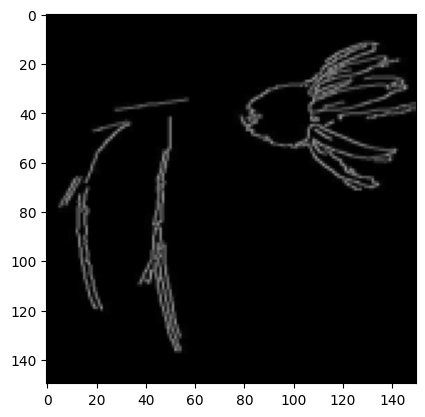

In [153]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.image as mpimg



# Load the models



# Load and preprocess the input image
#image_path = './CAMO-V.1.0/Images/Train/camourflage_00002.jpg'
image_path = './CAMO-V.1.0/Canny_Filtered_images/camourflage_00002.jpg'

img2 = plt.imread(image_path)

# load images
image = mpimg.imread(image_path)
image = Image.open(image_path).convert('RGB')

plt.imshow(image)



transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor()
])

img2 = Image.fromarray(img2)
image = transform(img2)
plt.imshow(image.T)


#apply canny
# img_blur = cv2.GaussianBlur(img2, (5, 5), 0)
# edges = cv2.Canny(img_blur, threshold1=100, threshold2=200)
# plt.imshow(edges.T)

#plt.imshow(image.T)
image = torch.tensor(image)
image = torch.flatten(image)

print(image)


In [139]:
image_dir = r'./CAMO-V.1.0/Canny_Filtered_images/'
mask_dir = r'./CAMO-V.1.0/new_masks/'

dataset = MyDataset(image_dir, mask_dir, transform=None)
dataloader = DataLoader(dataset, batch_size=5, shuffle=True)

In [144]:
for i, data in enumerate(dataloader, 0):
    img = data['image'].to('cuda')
    break
img

/tmp/ipykernel_9628/3111654539.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(image)
/tmp/ipykernel_9628/3111654539.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask)


tensor([[0.0235, 0.3137, 0.3020,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0118, 0.0353, 0.0078],
        [0.0000, 0.0000, 0.0000,  ..., 0.0196, 0.1059, 0.2235],
        [0.0000, 0.0000, 0.0000,  ..., 0.1725, 0.0235, 0.0000]],
       device='cuda:0')

In [147]:
out_masks = model(img)

In [151]:
len(out_masks[0])
#remove ap

67500

In [155]:
img_reshaped = out_masks[0].reshape((150, 150, 3))

In [167]:
temp = img_reshaped.detach()
img = temp.cpu()
type(img.numpy())
np_img = img

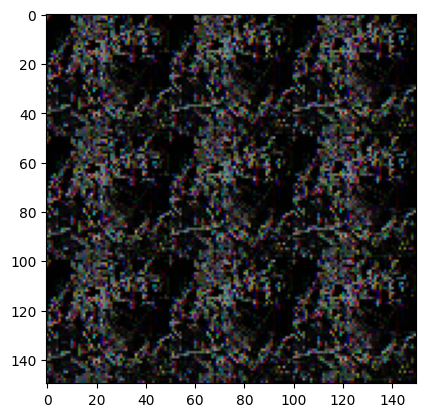

In [168]:
plt.imshow(np_img)

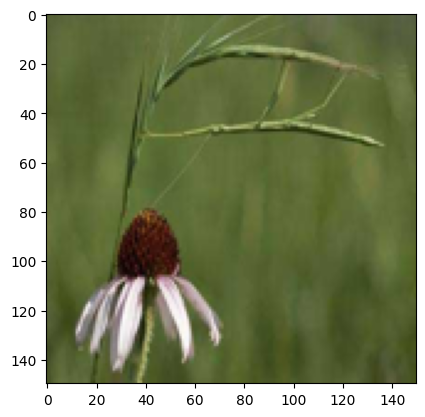

In [115]:
from PIL import Image

# Open image
image = Image.open(image_path)

# Resize image
image = image.resize((150, 150))

# Display image
plt.imshow(image)

# Training Model FULL Mask

In [3]:
import torch
import torch as t
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer
import os

In [6]:
class MaskMaker(nn.Module):
    def __init__(self):
        super(MaskMaker, self).__init__()

        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.bn6 = nn.BatchNorm2d(512)
        
        self.fc = nn.Linear(512*2*2, 150*150)
        
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.bn4(self.conv4(x)))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.bn5(self.conv5(x)))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.bn6(self.conv6(x)))
        x = F.max_pool2d(x, 2)
        
        x = x.view(-1, 512*2*2)
        x = F.sigmoid(self.fc(x))
        x = x.view(-1, 1, 150, 150)
        return x.T


In [229]:
2048/512

4.0

In [233]:
# del model
# del data
# torch.cuda.empty_cache() 
# gc.collect()

12320

In [9]:
import os 
train_dirs = os.listdir('./CAMO-V.1.0/Images/Train')
train_dirs

['camourflage_00001.jpg',
 'camourflage_00002.jpg',
 'camourflage_00003.jpg',
 'camourflage_00004.jpg',
 'camourflage_00005.jpg',
 'camourflage_00006.jpg',
 'camourflage_00007.jpg',
 'camourflage_00008.jpg',
 'camourflage_00009.jpg',
 'camourflage_00010.jpg',
 'camourflage_00011.jpg',
 'camourflage_00013.jpg',
 'camourflage_00014.jpg',
 'camourflage_00015.jpg',
 'camourflage_00016.jpg',
 'camourflage_00019.jpg',
 'camourflage_00020.jpg',
 'camourflage_00021.jpg',
 'camourflage_00022.jpg',
 'camourflage_00023.jpg',
 'camourflage_00024.jpg',
 'camourflage_00025.jpg',
 'camourflage_00026.jpg',
 'camourflage_00027.jpg',
 'camourflage_00028.jpg',
 'camourflage_00029.jpg',
 'camourflage_00030.jpg',
 'camourflage_00031.jpg',
 'camourflage_00032.jpg',
 'camourflage_00033.jpg',
 'camourflage_00035.jpg',
 'camourflage_00036.jpg',
 'camourflage_00037.jpg',
 'camourflage_00038.jpg',
 'camourflage_00039.jpg',
 'camourflage_00040.jpg',
 'camourflage_00041.jpg',
 'camourflage_00042.jpg',
 'camourflag

In [18]:
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

import numpy as np

class MyDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform

    def __len__(self):
        #return len(self.text_list)
        return 1000
        
    def __getitem__(self, idx):
        # load image and convert to RGB
        name = train_dirs[idx]
        img_path = os.path.join(self.image_dir, name)
        image = Image.open(img_path).convert('L')
        
        mask_path = os.path.join(self.mask_dir, name.replace('.jpg','.png'))
        mask = Image.open(mask_path).convert('L')

        #transform = transforms.Compose([transforms.PILToTensor()])
        transform = transforms.Compose([transforms.Resize((150,150)), transforms.ToTensor()])


        # transform = transforms.PILToTensor()
        # Convert the PIL image to Torch tensor
        
        image = transform(image)
        image = torch.tensor(image)
        #image = torch.flatten(image)
        
        
        #transforming mask
        mask = transform(mask)
        mask = torch.tensor(mask)
        #mask = torch.flatten(mask)
        
        #if len(mask) == 22500:
        #    mask = torch.nn.functional.pad(mask, (0, 45000), mode='constant', value=0)  # shape: [1, 7500]

        
        #print('img len:', np.shape(image), ' mask len:',np.shape(mask))


        # return the sample as a dictionary
        sample = {'image': image,  'mask':mask}
        return sample

# Example usage
#image_dir = "./memotion_dataset_7k/images"
image_dir = r'./CAMO-V.1.0/Canny_Filtered_images/'
mask_dir = r'./CAMO-V.1.0/GT/'

dataset = MyDataset(image_dir, mask_dir, transform=None)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)


In [19]:
import torch.optim as optim
import gc

model = MaskMaker()
model = model.to('cuda')
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
num_epochs = 50

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        #try:
        image = data['image'].to('cuda')
        #print("No.",i," batch of 5 images being processed...s")

        optimizer.zero_grad()
        mask = data['mask'].to('cuda')
        # Forward pass
        output_mask = model(image)
        
        l1 = output_mask.flatten().T
        l2 = mask.flatten()
        

        loss = criterion(l1, l2)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()

        if i % 10 == 4:    # Print every 10 mini-batches
            print('[Epoch: %d, Batch: %d] Loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 10000))
            running_loss = 0.0
#         except (ValueError, TypeError):
#             # code to handle the error
#             print("Error: invalid value or type")

/tmp/ipykernel_16160/4173491024.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(image)
/tmp/ipykernel_16160/4173491024.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask)


[Epoch: 1, Batch: 5] Loss: 25.773
[Epoch: 1, Batch: 15] Loss: 23.036
[Epoch: 1, Batch: 25] Loss: 20.686
[Epoch: 1, Batch: 35] Loss: 35.423
[Epoch: 1, Batch: 45] Loss: 38.610
[Epoch: 1, Batch: 55] Loss: 27.289
[Epoch: 1, Batch: 65] Loss: 32.692
[Epoch: 1, Batch: 75] Loss: 51.077
[Epoch: 1, Batch: 85] Loss: 26.942
[Epoch: 1, Batch: 95] Loss: 31.440
[Epoch: 1, Batch: 105] Loss: 30.655
[Epoch: 1, Batch: 115] Loss: 40.715
[Epoch: 1, Batch: 125] Loss: 21.910
[Epoch: 1, Batch: 135] Loss: 33.294
[Epoch: 1, Batch: 145] Loss: 38.135
[Epoch: 1, Batch: 155] Loss: 23.552
[Epoch: 1, Batch: 165] Loss: 40.860
[Epoch: 1, Batch: 175] Loss: 45.090
[Epoch: 1, Batch: 185] Loss: 36.241
[Epoch: 1, Batch: 195] Loss: 40.597
[Epoch: 1, Batch: 205] Loss: 32.147
[Epoch: 1, Batch: 215] Loss: 49.663
[Epoch: 1, Batch: 225] Loss: 29.718
[Epoch: 1, Batch: 235] Loss: 36.106
[Epoch: 1, Batch: 245] Loss: 40.748
[Epoch: 1, Batch: 255] Loss: 35.657
[Epoch: 1, Batch: 265] Loss: 22.229
[Epoch: 1, Batch: 275] Loss: 39.257
[Ep

[Epoch: 3, Batch: 295] Loss: 28.973
[Epoch: 3, Batch: 305] Loss: 33.368
[Epoch: 3, Batch: 315] Loss: 25.508
[Epoch: 3, Batch: 325] Loss: 30.860
[Epoch: 3, Batch: 335] Loss: 30.152
[Epoch: 3, Batch: 345] Loss: 47.008
[Epoch: 3, Batch: 355] Loss: 38.974
[Epoch: 3, Batch: 365] Loss: 30.728
[Epoch: 3, Batch: 375] Loss: 33.281
[Epoch: 3, Batch: 385] Loss: 33.197
[Epoch: 3, Batch: 395] Loss: 29.364
[Epoch: 3, Batch: 405] Loss: 36.153
[Epoch: 3, Batch: 415] Loss: 39.238
[Epoch: 3, Batch: 425] Loss: 32.971
[Epoch: 3, Batch: 435] Loss: 18.514
[Epoch: 3, Batch: 445] Loss: 31.913
[Epoch: 3, Batch: 455] Loss: 39.905
[Epoch: 3, Batch: 465] Loss: 37.231
[Epoch: 3, Batch: 475] Loss: 31.976
[Epoch: 3, Batch: 485] Loss: 25.694
[Epoch: 3, Batch: 495] Loss: 52.365
[Epoch: 3, Batch: 505] Loss: 36.656
[Epoch: 3, Batch: 515] Loss: 30.898
[Epoch: 3, Batch: 525] Loss: 33.310
[Epoch: 3, Batch: 535] Loss: 34.079
[Epoch: 3, Batch: 545] Loss: 51.971
[Epoch: 3, Batch: 555] Loss: 19.464
[Epoch: 3, Batch: 565] Loss:

[Epoch: 5, Batch: 585] Loss: 44.518
[Epoch: 5, Batch: 595] Loss: 32.597
[Epoch: 5, Batch: 605] Loss: 31.000
[Epoch: 5, Batch: 615] Loss: 46.376
[Epoch: 5, Batch: 625] Loss: 36.691
[Epoch: 5, Batch: 635] Loss: 40.970
[Epoch: 5, Batch: 645] Loss: 33.128
[Epoch: 5, Batch: 655] Loss: 30.150
[Epoch: 5, Batch: 665] Loss: 27.456
[Epoch: 5, Batch: 675] Loss: 38.740
[Epoch: 5, Batch: 685] Loss: 29.508
[Epoch: 5, Batch: 695] Loss: 40.302
[Epoch: 5, Batch: 705] Loss: 28.591
[Epoch: 5, Batch: 715] Loss: 41.732
[Epoch: 5, Batch: 725] Loss: 40.249
[Epoch: 5, Batch: 735] Loss: 43.502
[Epoch: 5, Batch: 745] Loss: 24.263
[Epoch: 5, Batch: 755] Loss: 40.721
[Epoch: 5, Batch: 765] Loss: 48.072
[Epoch: 5, Batch: 775] Loss: 20.731
[Epoch: 5, Batch: 785] Loss: 27.460
[Epoch: 5, Batch: 795] Loss: 32.486
[Epoch: 5, Batch: 805] Loss: 21.223
[Epoch: 5, Batch: 815] Loss: 45.052
[Epoch: 5, Batch: 825] Loss: 32.386
[Epoch: 5, Batch: 835] Loss: 29.387
[Epoch: 5, Batch: 845] Loss: 27.534
[Epoch: 5, Batch: 855] Loss:

[Epoch: 7, Batch: 875] Loss: 44.515
[Epoch: 7, Batch: 885] Loss: 32.707
[Epoch: 7, Batch: 895] Loss: 53.524
[Epoch: 7, Batch: 905] Loss: 30.725
[Epoch: 7, Batch: 915] Loss: 31.869
[Epoch: 7, Batch: 925] Loss: 38.626
[Epoch: 7, Batch: 935] Loss: 24.009
[Epoch: 7, Batch: 945] Loss: 33.470
[Epoch: 7, Batch: 955] Loss: 24.200
[Epoch: 7, Batch: 965] Loss: 30.370
[Epoch: 7, Batch: 975] Loss: 36.178
[Epoch: 7, Batch: 985] Loss: 30.623
[Epoch: 7, Batch: 995] Loss: 21.026
[Epoch: 8, Batch: 5] Loss: 22.564
[Epoch: 8, Batch: 15] Loss: 24.972
[Epoch: 8, Batch: 25] Loss: 22.669
[Epoch: 8, Batch: 35] Loss: 33.512
[Epoch: 8, Batch: 45] Loss: 30.535
[Epoch: 8, Batch: 55] Loss: 34.210
[Epoch: 8, Batch: 65] Loss: 45.668
[Epoch: 8, Batch: 75] Loss: 31.323
[Epoch: 8, Batch: 85] Loss: 29.406
[Epoch: 8, Batch: 95] Loss: 35.152
[Epoch: 8, Batch: 105] Loss: 29.917
[Epoch: 8, Batch: 115] Loss: 48.061
[Epoch: 8, Batch: 125] Loss: 50.989
[Epoch: 8, Batch: 135] Loss: 20.776
[Epoch: 8, Batch: 145] Loss: 29.643
[Ep

[Epoch: 10, Batch: 165] Loss: 41.687
[Epoch: 10, Batch: 175] Loss: 58.357
[Epoch: 10, Batch: 185] Loss: 26.889
[Epoch: 10, Batch: 195] Loss: 41.911
[Epoch: 10, Batch: 205] Loss: 32.068
[Epoch: 10, Batch: 215] Loss: 29.566
[Epoch: 10, Batch: 225] Loss: 27.377
[Epoch: 10, Batch: 235] Loss: 44.824
[Epoch: 10, Batch: 245] Loss: 36.386
[Epoch: 10, Batch: 255] Loss: 33.482
[Epoch: 10, Batch: 265] Loss: 28.404
[Epoch: 10, Batch: 275] Loss: 35.944
[Epoch: 10, Batch: 285] Loss: 41.590
[Epoch: 10, Batch: 295] Loss: 33.824
[Epoch: 10, Batch: 305] Loss: 28.839
[Epoch: 10, Batch: 315] Loss: 40.505
[Epoch: 10, Batch: 325] Loss: 51.633
[Epoch: 10, Batch: 335] Loss: 29.544
[Epoch: 10, Batch: 345] Loss: 48.190
[Epoch: 10, Batch: 355] Loss: 40.385
[Epoch: 10, Batch: 365] Loss: 26.675
[Epoch: 10, Batch: 375] Loss: 15.376
[Epoch: 10, Batch: 385] Loss: 33.001
[Epoch: 10, Batch: 395] Loss: 25.251
[Epoch: 10, Batch: 405] Loss: 41.710
[Epoch: 10, Batch: 415] Loss: 32.528
[Epoch: 10, Batch: 425] Loss: 27.336
[

[Epoch: 12, Batch: 395] Loss: 44.854
[Epoch: 12, Batch: 405] Loss: 25.524
[Epoch: 12, Batch: 415] Loss: 28.809
[Epoch: 12, Batch: 425] Loss: 42.116
[Epoch: 12, Batch: 435] Loss: 30.311
[Epoch: 12, Batch: 445] Loss: 39.165
[Epoch: 12, Batch: 455] Loss: 23.785
[Epoch: 12, Batch: 465] Loss: 52.608
[Epoch: 12, Batch: 475] Loss: 34.438
[Epoch: 12, Batch: 485] Loss: 25.765
[Epoch: 12, Batch: 495] Loss: 29.933
[Epoch: 12, Batch: 505] Loss: 39.142
[Epoch: 12, Batch: 515] Loss: 27.199
[Epoch: 12, Batch: 525] Loss: 35.355
[Epoch: 12, Batch: 535] Loss: 47.915
[Epoch: 12, Batch: 545] Loss: 35.085
[Epoch: 12, Batch: 555] Loss: 36.650
[Epoch: 12, Batch: 565] Loss: 46.194
[Epoch: 12, Batch: 575] Loss: 46.553
[Epoch: 12, Batch: 585] Loss: 28.629
[Epoch: 12, Batch: 595] Loss: 36.551
[Epoch: 12, Batch: 605] Loss: 31.595
[Epoch: 12, Batch: 615] Loss: 36.662
[Epoch: 12, Batch: 625] Loss: 46.565
[Epoch: 12, Batch: 635] Loss: 48.616
[Epoch: 12, Batch: 645] Loss: 27.621
[Epoch: 12, Batch: 655] Loss: 36.002
[

[Epoch: 14, Batch: 625] Loss: 26.929
[Epoch: 14, Batch: 635] Loss: 37.575
[Epoch: 14, Batch: 645] Loss: 22.019
[Epoch: 14, Batch: 655] Loss: 29.454
[Epoch: 14, Batch: 665] Loss: 36.720
[Epoch: 14, Batch: 675] Loss: 42.641
[Epoch: 14, Batch: 685] Loss: 32.758
[Epoch: 14, Batch: 695] Loss: 28.204
[Epoch: 14, Batch: 705] Loss: 27.994
[Epoch: 14, Batch: 715] Loss: 31.445
[Epoch: 14, Batch: 725] Loss: 23.949
[Epoch: 14, Batch: 735] Loss: 32.395
[Epoch: 14, Batch: 745] Loss: 34.412
[Epoch: 14, Batch: 755] Loss: 37.060
[Epoch: 14, Batch: 765] Loss: 28.570
[Epoch: 14, Batch: 775] Loss: 37.628
[Epoch: 14, Batch: 785] Loss: 46.974
[Epoch: 14, Batch: 795] Loss: 37.306
[Epoch: 14, Batch: 805] Loss: 33.570
[Epoch: 14, Batch: 815] Loss: 42.189
[Epoch: 14, Batch: 825] Loss: 34.249
[Epoch: 14, Batch: 835] Loss: 41.949
[Epoch: 14, Batch: 845] Loss: 47.526
[Epoch: 14, Batch: 855] Loss: 38.490
[Epoch: 14, Batch: 865] Loss: 51.191
[Epoch: 14, Batch: 875] Loss: 35.729
[Epoch: 14, Batch: 885] Loss: 39.014
[

[Epoch: 16, Batch: 855] Loss: 17.803
[Epoch: 16, Batch: 865] Loss: 34.937
[Epoch: 16, Batch: 875] Loss: 32.743
[Epoch: 16, Batch: 885] Loss: 38.079
[Epoch: 16, Batch: 895] Loss: 37.445
[Epoch: 16, Batch: 905] Loss: 30.774
[Epoch: 16, Batch: 915] Loss: 28.249
[Epoch: 16, Batch: 925] Loss: 32.161
[Epoch: 16, Batch: 935] Loss: 42.269
[Epoch: 16, Batch: 945] Loss: 40.822
[Epoch: 16, Batch: 955] Loss: 40.101
[Epoch: 16, Batch: 965] Loss: 24.901
[Epoch: 16, Batch: 975] Loss: 51.809
[Epoch: 16, Batch: 985] Loss: 32.672
[Epoch: 16, Batch: 995] Loss: 40.517
[Epoch: 17, Batch: 5] Loss: 22.563
[Epoch: 17, Batch: 15] Loss: 32.469
[Epoch: 17, Batch: 25] Loss: 32.643
[Epoch: 17, Batch: 35] Loss: 28.561
[Epoch: 17, Batch: 45] Loss: 41.100
[Epoch: 17, Batch: 55] Loss: 40.461
[Epoch: 17, Batch: 65] Loss: 43.094
[Epoch: 17, Batch: 75] Loss: 26.480
[Epoch: 17, Batch: 85] Loss: 32.909
[Epoch: 17, Batch: 95] Loss: 24.958
[Epoch: 17, Batch: 105] Loss: 43.963
[Epoch: 17, Batch: 115] Loss: 25.262
[Epoch: 17, 

[Epoch: 19, Batch: 85] Loss: 27.335
[Epoch: 19, Batch: 95] Loss: 41.491
[Epoch: 19, Batch: 105] Loss: 28.859
[Epoch: 19, Batch: 115] Loss: 30.819
[Epoch: 19, Batch: 125] Loss: 38.754
[Epoch: 19, Batch: 135] Loss: 45.243
[Epoch: 19, Batch: 145] Loss: 27.964
[Epoch: 19, Batch: 155] Loss: 31.537
[Epoch: 19, Batch: 165] Loss: 23.044
[Epoch: 19, Batch: 175] Loss: 29.086
[Epoch: 19, Batch: 185] Loss: 29.032
[Epoch: 19, Batch: 195] Loss: 24.329
[Epoch: 19, Batch: 205] Loss: 40.834
[Epoch: 19, Batch: 215] Loss: 41.191
[Epoch: 19, Batch: 225] Loss: 42.094
[Epoch: 19, Batch: 235] Loss: 27.682
[Epoch: 19, Batch: 245] Loss: 42.709
[Epoch: 19, Batch: 255] Loss: 25.465
[Epoch: 19, Batch: 265] Loss: 37.185
[Epoch: 19, Batch: 275] Loss: 31.054
[Epoch: 19, Batch: 285] Loss: 48.458
[Epoch: 19, Batch: 295] Loss: 51.147
[Epoch: 19, Batch: 305] Loss: 36.819
[Epoch: 19, Batch: 315] Loss: 29.048
[Epoch: 19, Batch: 325] Loss: 29.341
[Epoch: 19, Batch: 335] Loss: 35.380
[Epoch: 19, Batch: 345] Loss: 36.793
[Ep

[Epoch: 21, Batch: 315] Loss: 27.515
[Epoch: 21, Batch: 325] Loss: 28.333
[Epoch: 21, Batch: 335] Loss: 25.115
[Epoch: 21, Batch: 345] Loss: 38.740
[Epoch: 21, Batch: 355] Loss: 46.575
[Epoch: 21, Batch: 365] Loss: 28.888
[Epoch: 21, Batch: 375] Loss: 42.576
[Epoch: 21, Batch: 385] Loss: 41.744
[Epoch: 21, Batch: 395] Loss: 31.061
[Epoch: 21, Batch: 405] Loss: 29.643
[Epoch: 21, Batch: 415] Loss: 24.711
[Epoch: 21, Batch: 425] Loss: 38.419
[Epoch: 21, Batch: 435] Loss: 30.324
[Epoch: 21, Batch: 445] Loss: 44.558
[Epoch: 21, Batch: 455] Loss: 36.964
[Epoch: 21, Batch: 465] Loss: 46.922
[Epoch: 21, Batch: 475] Loss: 56.764
[Epoch: 21, Batch: 485] Loss: 44.103
[Epoch: 21, Batch: 495] Loss: 37.690
[Epoch: 21, Batch: 505] Loss: 39.954
[Epoch: 21, Batch: 515] Loss: 33.434
[Epoch: 21, Batch: 525] Loss: 36.287
[Epoch: 21, Batch: 535] Loss: 48.429
[Epoch: 21, Batch: 545] Loss: 50.020
[Epoch: 21, Batch: 555] Loss: 25.447
[Epoch: 21, Batch: 565] Loss: 23.719
[Epoch: 21, Batch: 575] Loss: 31.660
[

[Epoch: 23, Batch: 545] Loss: 28.301
[Epoch: 23, Batch: 555] Loss: 34.076
[Epoch: 23, Batch: 565] Loss: 46.522
[Epoch: 23, Batch: 575] Loss: 24.784
[Epoch: 23, Batch: 585] Loss: 28.410
[Epoch: 23, Batch: 595] Loss: 41.598
[Epoch: 23, Batch: 605] Loss: 45.986
[Epoch: 23, Batch: 615] Loss: 34.901
[Epoch: 23, Batch: 625] Loss: 42.660
[Epoch: 23, Batch: 635] Loss: 32.946
[Epoch: 23, Batch: 645] Loss: 31.362
[Epoch: 23, Batch: 655] Loss: 36.204
[Epoch: 23, Batch: 665] Loss: 43.024
[Epoch: 23, Batch: 675] Loss: 36.654
[Epoch: 23, Batch: 685] Loss: 44.588
[Epoch: 23, Batch: 695] Loss: 27.275
[Epoch: 23, Batch: 705] Loss: 49.522
[Epoch: 23, Batch: 715] Loss: 30.065
[Epoch: 23, Batch: 725] Loss: 29.695
[Epoch: 23, Batch: 735] Loss: 38.817
[Epoch: 23, Batch: 745] Loss: 48.536
[Epoch: 23, Batch: 755] Loss: 46.243
[Epoch: 23, Batch: 765] Loss: 34.989
[Epoch: 23, Batch: 775] Loss: 34.756
[Epoch: 23, Batch: 785] Loss: 42.963
[Epoch: 23, Batch: 795] Loss: 42.201
[Epoch: 23, Batch: 805] Loss: 24.691
[

[Epoch: 25, Batch: 775] Loss: 30.885
[Epoch: 25, Batch: 785] Loss: 44.121
[Epoch: 25, Batch: 795] Loss: 45.131
[Epoch: 25, Batch: 805] Loss: 34.821
[Epoch: 25, Batch: 815] Loss: 36.728
[Epoch: 25, Batch: 825] Loss: 44.764
[Epoch: 25, Batch: 835] Loss: 33.855
[Epoch: 25, Batch: 845] Loss: 41.105
[Epoch: 25, Batch: 855] Loss: 35.000
[Epoch: 25, Batch: 865] Loss: 30.685
[Epoch: 25, Batch: 875] Loss: 42.746
[Epoch: 25, Batch: 885] Loss: 33.811
[Epoch: 25, Batch: 895] Loss: 26.067
[Epoch: 25, Batch: 905] Loss: 43.003
[Epoch: 25, Batch: 915] Loss: 32.673
[Epoch: 25, Batch: 925] Loss: 27.381
[Epoch: 25, Batch: 935] Loss: 21.184
[Epoch: 25, Batch: 945] Loss: 40.581
[Epoch: 25, Batch: 955] Loss: 30.628
[Epoch: 25, Batch: 965] Loss: 30.562
[Epoch: 25, Batch: 975] Loss: 44.734
[Epoch: 25, Batch: 985] Loss: 44.518
[Epoch: 25, Batch: 995] Loss: 29.889
[Epoch: 26, Batch: 5] Loss: 12.535
[Epoch: 26, Batch: 15] Loss: 28.133
[Epoch: 26, Batch: 25] Loss: 13.553
[Epoch: 26, Batch: 35] Loss: 35.080
[Epoch

[Epoch: 28, Batch: 5] Loss: 19.184
[Epoch: 28, Batch: 15] Loss: 48.625
[Epoch: 28, Batch: 25] Loss: 42.364
[Epoch: 28, Batch: 35] Loss: 18.801
[Epoch: 28, Batch: 45] Loss: 30.764
[Epoch: 28, Batch: 55] Loss: 37.183
[Epoch: 28, Batch: 65] Loss: 32.805
[Epoch: 28, Batch: 75] Loss: 21.141
[Epoch: 28, Batch: 85] Loss: 26.693
[Epoch: 28, Batch: 95] Loss: 40.432
[Epoch: 28, Batch: 105] Loss: 42.894
[Epoch: 28, Batch: 115] Loss: 28.620
[Epoch: 28, Batch: 125] Loss: 29.039
[Epoch: 28, Batch: 135] Loss: 18.624
[Epoch: 28, Batch: 145] Loss: 41.219
[Epoch: 28, Batch: 155] Loss: 34.679
[Epoch: 28, Batch: 165] Loss: 33.137
[Epoch: 28, Batch: 175] Loss: 44.091
[Epoch: 28, Batch: 185] Loss: 32.324
[Epoch: 28, Batch: 195] Loss: 29.451
[Epoch: 28, Batch: 205] Loss: 31.933
[Epoch: 28, Batch: 215] Loss: 23.618
[Epoch: 28, Batch: 225] Loss: 45.534
[Epoch: 28, Batch: 235] Loss: 28.895
[Epoch: 28, Batch: 245] Loss: 29.717
[Epoch: 28, Batch: 255] Loss: 41.216
[Epoch: 28, Batch: 265] Loss: 22.883
[Epoch: 28, 

[Epoch: 30, Batch: 235] Loss: 38.122
[Epoch: 30, Batch: 245] Loss: 27.693
[Epoch: 30, Batch: 255] Loss: 41.025
[Epoch: 30, Batch: 265] Loss: 27.752
[Epoch: 30, Batch: 275] Loss: 21.896
[Epoch: 30, Batch: 285] Loss: 70.182
[Epoch: 30, Batch: 295] Loss: 41.683
[Epoch: 30, Batch: 305] Loss: 39.982
[Epoch: 30, Batch: 315] Loss: 35.819
[Epoch: 30, Batch: 325] Loss: 37.685
[Epoch: 30, Batch: 335] Loss: 33.956
[Epoch: 30, Batch: 345] Loss: 37.049
[Epoch: 30, Batch: 355] Loss: 31.369
[Epoch: 30, Batch: 365] Loss: 42.917
[Epoch: 30, Batch: 375] Loss: 44.980
[Epoch: 30, Batch: 385] Loss: 35.713
[Epoch: 30, Batch: 395] Loss: 47.261
[Epoch: 30, Batch: 405] Loss: 26.408
[Epoch: 30, Batch: 415] Loss: 37.447
[Epoch: 30, Batch: 425] Loss: 20.283
[Epoch: 30, Batch: 435] Loss: 42.583
[Epoch: 30, Batch: 445] Loss: 39.275
[Epoch: 30, Batch: 455] Loss: 29.604
[Epoch: 30, Batch: 465] Loss: 40.104
[Epoch: 30, Batch: 475] Loss: 43.564
[Epoch: 30, Batch: 485] Loss: 42.580
[Epoch: 30, Batch: 495] Loss: 29.295
[

[Epoch: 32, Batch: 465] Loss: 42.658
[Epoch: 32, Batch: 475] Loss: 38.250
[Epoch: 32, Batch: 485] Loss: 34.574
[Epoch: 32, Batch: 495] Loss: 43.354
[Epoch: 32, Batch: 505] Loss: 31.895
[Epoch: 32, Batch: 515] Loss: 32.963
[Epoch: 32, Batch: 525] Loss: 22.858
[Epoch: 32, Batch: 535] Loss: 27.727
[Epoch: 32, Batch: 545] Loss: 32.531
[Epoch: 32, Batch: 555] Loss: 25.241
[Epoch: 32, Batch: 565] Loss: 38.382
[Epoch: 32, Batch: 575] Loss: 24.854
[Epoch: 32, Batch: 585] Loss: 31.239
[Epoch: 32, Batch: 595] Loss: 44.912
[Epoch: 32, Batch: 605] Loss: 36.083
[Epoch: 32, Batch: 615] Loss: 27.584
[Epoch: 32, Batch: 625] Loss: 28.439
[Epoch: 32, Batch: 635] Loss: 53.143
[Epoch: 32, Batch: 645] Loss: 24.366
[Epoch: 32, Batch: 655] Loss: 25.115
[Epoch: 32, Batch: 665] Loss: 44.537
[Epoch: 32, Batch: 675] Loss: 36.472
[Epoch: 32, Batch: 685] Loss: 47.514
[Epoch: 32, Batch: 695] Loss: 42.604
[Epoch: 32, Batch: 705] Loss: 50.663
[Epoch: 32, Batch: 715] Loss: 49.439
[Epoch: 32, Batch: 725] Loss: 34.963
[

[Epoch: 34, Batch: 695] Loss: 40.120
[Epoch: 34, Batch: 705] Loss: 31.544
[Epoch: 34, Batch: 715] Loss: 31.208
[Epoch: 34, Batch: 725] Loss: 38.526
[Epoch: 34, Batch: 735] Loss: 20.886
[Epoch: 34, Batch: 745] Loss: 49.799
[Epoch: 34, Batch: 755] Loss: 35.256
[Epoch: 34, Batch: 765] Loss: 36.563
[Epoch: 34, Batch: 775] Loss: 44.310
[Epoch: 34, Batch: 785] Loss: 33.441
[Epoch: 34, Batch: 795] Loss: 34.188
[Epoch: 34, Batch: 805] Loss: 26.803
[Epoch: 34, Batch: 815] Loss: 25.670
[Epoch: 34, Batch: 825] Loss: 23.266
[Epoch: 34, Batch: 835] Loss: 31.634
[Epoch: 34, Batch: 845] Loss: 29.020
[Epoch: 34, Batch: 855] Loss: 31.626
[Epoch: 34, Batch: 865] Loss: 38.846
[Epoch: 34, Batch: 875] Loss: 34.421
[Epoch: 34, Batch: 885] Loss: 29.198
[Epoch: 34, Batch: 895] Loss: 31.228
[Epoch: 34, Batch: 905] Loss: 32.670
[Epoch: 34, Batch: 915] Loss: 30.696
[Epoch: 34, Batch: 925] Loss: 37.439
[Epoch: 34, Batch: 935] Loss: 36.571
[Epoch: 34, Batch: 945] Loss: 25.766
[Epoch: 34, Batch: 955] Loss: 26.321
[

[Epoch: 36, Batch: 925] Loss: 29.322
[Epoch: 36, Batch: 935] Loss: 32.338
[Epoch: 36, Batch: 945] Loss: 28.655
[Epoch: 36, Batch: 955] Loss: 31.561
[Epoch: 36, Batch: 965] Loss: 39.962
[Epoch: 36, Batch: 975] Loss: 46.058
[Epoch: 36, Batch: 985] Loss: 26.478
[Epoch: 36, Batch: 995] Loss: 24.514
[Epoch: 37, Batch: 5] Loss: 12.591
[Epoch: 37, Batch: 15] Loss: 24.479
[Epoch: 37, Batch: 25] Loss: 32.057
[Epoch: 37, Batch: 35] Loss: 39.295
[Epoch: 37, Batch: 45] Loss: 45.682
[Epoch: 37, Batch: 55] Loss: 25.776
[Epoch: 37, Batch: 65] Loss: 47.326
[Epoch: 37, Batch: 75] Loss: 37.034
[Epoch: 37, Batch: 85] Loss: 46.482
[Epoch: 37, Batch: 95] Loss: 33.689
[Epoch: 37, Batch: 105] Loss: 52.159
[Epoch: 37, Batch: 115] Loss: 36.905
[Epoch: 37, Batch: 125] Loss: 54.593
[Epoch: 37, Batch: 135] Loss: 40.130
[Epoch: 37, Batch: 145] Loss: 26.220
[Epoch: 37, Batch: 155] Loss: 38.708
[Epoch: 37, Batch: 165] Loss: 46.597
[Epoch: 37, Batch: 175] Loss: 22.612
[Epoch: 37, Batch: 185] Loss: 23.610
[Epoch: 37, 

[Epoch: 39, Batch: 155] Loss: 37.106
[Epoch: 39, Batch: 165] Loss: 34.078
[Epoch: 39, Batch: 175] Loss: 24.661
[Epoch: 39, Batch: 185] Loss: 28.860
[Epoch: 39, Batch: 195] Loss: 35.581
[Epoch: 39, Batch: 205] Loss: 29.513
[Epoch: 39, Batch: 215] Loss: 21.846
[Epoch: 39, Batch: 225] Loss: 43.043
[Epoch: 39, Batch: 235] Loss: 45.159
[Epoch: 39, Batch: 245] Loss: 40.030
[Epoch: 39, Batch: 255] Loss: 33.099
[Epoch: 39, Batch: 265] Loss: 40.799
[Epoch: 39, Batch: 275] Loss: 33.834
[Epoch: 39, Batch: 285] Loss: 32.762
[Epoch: 39, Batch: 295] Loss: 27.175
[Epoch: 39, Batch: 305] Loss: 28.329
[Epoch: 39, Batch: 315] Loss: 41.475
[Epoch: 39, Batch: 325] Loss: 31.541
[Epoch: 39, Batch: 335] Loss: 36.659
[Epoch: 39, Batch: 345] Loss: 25.262
[Epoch: 39, Batch: 355] Loss: 42.392
[Epoch: 39, Batch: 365] Loss: 40.893
[Epoch: 39, Batch: 375] Loss: 58.139
[Epoch: 39, Batch: 385] Loss: 30.282
[Epoch: 39, Batch: 395] Loss: 52.606
[Epoch: 39, Batch: 405] Loss: 38.283
[Epoch: 39, Batch: 415] Loss: 40.833
[

[Epoch: 41, Batch: 385] Loss: 38.792
[Epoch: 41, Batch: 395] Loss: 35.812
[Epoch: 41, Batch: 405] Loss: 43.766
[Epoch: 41, Batch: 415] Loss: 31.917
[Epoch: 41, Batch: 425] Loss: 33.862
[Epoch: 41, Batch: 435] Loss: 29.694
[Epoch: 41, Batch: 445] Loss: 24.722
[Epoch: 41, Batch: 455] Loss: 49.220
[Epoch: 41, Batch: 465] Loss: 41.680
[Epoch: 41, Batch: 475] Loss: 35.965
[Epoch: 41, Batch: 485] Loss: 23.729
[Epoch: 41, Batch: 495] Loss: 28.811
[Epoch: 41, Batch: 505] Loss: 23.845
[Epoch: 41, Batch: 515] Loss: 43.536
[Epoch: 41, Batch: 525] Loss: 39.154
[Epoch: 41, Batch: 535] Loss: 46.720
[Epoch: 41, Batch: 545] Loss: 19.967
[Epoch: 41, Batch: 555] Loss: 26.162
[Epoch: 41, Batch: 565] Loss: 41.801
[Epoch: 41, Batch: 575] Loss: 36.634
[Epoch: 41, Batch: 585] Loss: 33.163
[Epoch: 41, Batch: 595] Loss: 26.958
[Epoch: 41, Batch: 605] Loss: 28.678
[Epoch: 41, Batch: 615] Loss: 20.975
[Epoch: 41, Batch: 625] Loss: 46.299
[Epoch: 41, Batch: 635] Loss: 29.714
[Epoch: 41, Batch: 645] Loss: 42.446
[

[Epoch: 43, Batch: 615] Loss: 35.300
[Epoch: 43, Batch: 625] Loss: 33.980
[Epoch: 43, Batch: 635] Loss: 32.326
[Epoch: 43, Batch: 645] Loss: 23.926
[Epoch: 43, Batch: 655] Loss: 14.125
[Epoch: 43, Batch: 665] Loss: 27.911
[Epoch: 43, Batch: 675] Loss: 31.981
[Epoch: 43, Batch: 685] Loss: 23.407
[Epoch: 43, Batch: 695] Loss: 25.034
[Epoch: 43, Batch: 705] Loss: 39.357
[Epoch: 43, Batch: 715] Loss: 43.225
[Epoch: 43, Batch: 725] Loss: 31.770
[Epoch: 43, Batch: 735] Loss: 30.393
[Epoch: 43, Batch: 745] Loss: 24.958
[Epoch: 43, Batch: 755] Loss: 24.973
[Epoch: 43, Batch: 765] Loss: 21.922
[Epoch: 43, Batch: 775] Loss: 39.167
[Epoch: 43, Batch: 785] Loss: 33.458
[Epoch: 43, Batch: 795] Loss: 50.518
[Epoch: 43, Batch: 805] Loss: 31.920
[Epoch: 43, Batch: 815] Loss: 27.895
[Epoch: 43, Batch: 825] Loss: 40.480
[Epoch: 43, Batch: 835] Loss: 45.926
[Epoch: 43, Batch: 845] Loss: 33.169
[Epoch: 43, Batch: 855] Loss: 38.497
[Epoch: 43, Batch: 865] Loss: 35.998
[Epoch: 43, Batch: 875] Loss: 43.102
[

[Epoch: 45, Batch: 845] Loss: 41.976
[Epoch: 45, Batch: 855] Loss: 28.661
[Epoch: 45, Batch: 865] Loss: 27.282
[Epoch: 45, Batch: 875] Loss: 36.110
[Epoch: 45, Batch: 885] Loss: 50.506
[Epoch: 45, Batch: 895] Loss: 38.765
[Epoch: 45, Batch: 905] Loss: 36.521
[Epoch: 45, Batch: 915] Loss: 33.329
[Epoch: 45, Batch: 925] Loss: 32.393
[Epoch: 45, Batch: 935] Loss: 47.002
[Epoch: 45, Batch: 945] Loss: 42.226
[Epoch: 45, Batch: 955] Loss: 43.354
[Epoch: 45, Batch: 965] Loss: 25.317
[Epoch: 45, Batch: 975] Loss: 35.230
[Epoch: 45, Batch: 985] Loss: 38.254
[Epoch: 45, Batch: 995] Loss: 31.098
[Epoch: 46, Batch: 5] Loss: 12.382
[Epoch: 46, Batch: 15] Loss: 33.308
[Epoch: 46, Batch: 25] Loss: 48.926
[Epoch: 46, Batch: 35] Loss: 37.343
[Epoch: 46, Batch: 45] Loss: 25.394
[Epoch: 46, Batch: 55] Loss: 31.010
[Epoch: 46, Batch: 65] Loss: 31.018
[Epoch: 46, Batch: 75] Loss: 42.254
[Epoch: 46, Batch: 85] Loss: 36.903
[Epoch: 46, Batch: 95] Loss: 26.618
[Epoch: 46, Batch: 105] Loss: 35.151
[Epoch: 46, 

[Epoch: 48, Batch: 75] Loss: 43.031
[Epoch: 48, Batch: 85] Loss: 28.929
[Epoch: 48, Batch: 95] Loss: 26.250
[Epoch: 48, Batch: 105] Loss: 37.969
[Epoch: 48, Batch: 115] Loss: 27.688
[Epoch: 48, Batch: 125] Loss: 48.145
[Epoch: 48, Batch: 135] Loss: 27.644
[Epoch: 48, Batch: 145] Loss: 34.418
[Epoch: 48, Batch: 155] Loss: 24.311
[Epoch: 48, Batch: 165] Loss: 24.188
[Epoch: 48, Batch: 175] Loss: 32.721
[Epoch: 48, Batch: 185] Loss: 58.079
[Epoch: 48, Batch: 195] Loss: 30.323
[Epoch: 48, Batch: 205] Loss: 32.704
[Epoch: 48, Batch: 215] Loss: 41.335
[Epoch: 48, Batch: 225] Loss: 30.054
[Epoch: 48, Batch: 235] Loss: 40.034
[Epoch: 48, Batch: 245] Loss: 39.078
[Epoch: 48, Batch: 255] Loss: 39.477
[Epoch: 48, Batch: 265] Loss: 27.320
[Epoch: 48, Batch: 275] Loss: 32.732
[Epoch: 48, Batch: 285] Loss: 59.286
[Epoch: 48, Batch: 295] Loss: 32.488
[Epoch: 48, Batch: 305] Loss: 29.855
[Epoch: 48, Batch: 315] Loss: 32.181
[Epoch: 48, Batch: 325] Loss: 47.075
[Epoch: 48, Batch: 335] Loss: 38.630
[Epo

[Epoch: 50, Batch: 305] Loss: 30.763
[Epoch: 50, Batch: 315] Loss: 47.352
[Epoch: 50, Batch: 325] Loss: 32.258
[Epoch: 50, Batch: 335] Loss: 38.044
[Epoch: 50, Batch: 345] Loss: 45.464
[Epoch: 50, Batch: 355] Loss: 36.958
[Epoch: 50, Batch: 365] Loss: 20.730
[Epoch: 50, Batch: 375] Loss: 50.637
[Epoch: 50, Batch: 385] Loss: 35.560
[Epoch: 50, Batch: 395] Loss: 26.974
[Epoch: 50, Batch: 405] Loss: 23.295
[Epoch: 50, Batch: 415] Loss: 36.352
[Epoch: 50, Batch: 425] Loss: 37.699
[Epoch: 50, Batch: 435] Loss: 32.240
[Epoch: 50, Batch: 445] Loss: 42.347
[Epoch: 50, Batch: 455] Loss: 38.255
[Epoch: 50, Batch: 465] Loss: 38.254
[Epoch: 50, Batch: 475] Loss: 28.080
[Epoch: 50, Batch: 485] Loss: 44.193
[Epoch: 50, Batch: 495] Loss: 43.402
[Epoch: 50, Batch: 505] Loss: 23.755
[Epoch: 50, Batch: 515] Loss: 29.384
[Epoch: 50, Batch: 525] Loss: 23.889
[Epoch: 50, Batch: 535] Loss: 41.669
[Epoch: 50, Batch: 545] Loss: 31.326
[Epoch: 50, Batch: 555] Loss: 25.663
[Epoch: 50, Batch: 565] Loss: 28.242
[

# Tensor Flow

In [20]:
import pickle

with open('camo_model_cnn.pkl', 'wb') as f:
    pickle.dump(model, f)

    f.close()

In [24]:
temp = image.detach()
img = temp.cpu()
type(img.numpy())
np_img = img

In [32]:
np.shape(img)

torch.Size([150, 150, 1, 1])

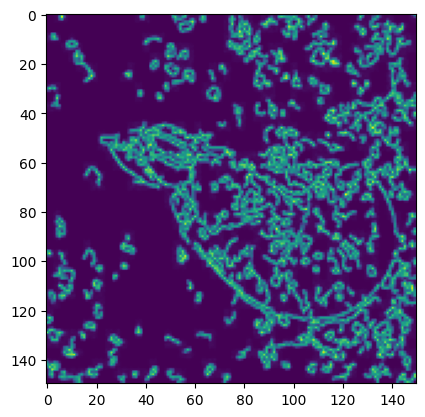

In [26]:
import matplotlib.pyplot as plt
plt.imshow(np_img.squeeze())

In [27]:
temp = output_mask.detach()
img = temp.cpu()
type(img.numpy())
np_img = img

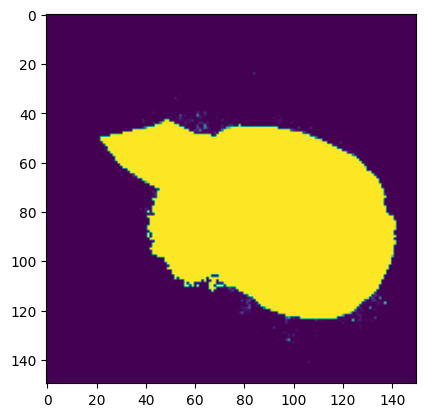

In [28]:
plt.imshow(np_img.squeeze())

# Testing

torch.Size([1, 1, 150, 150])


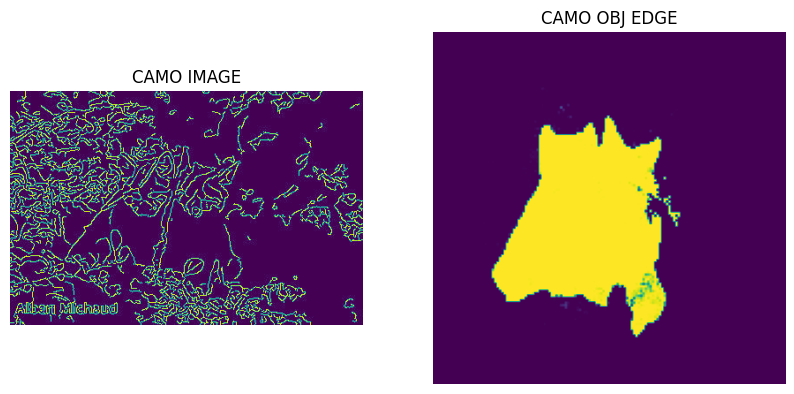

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# load images
img1 = mpimg.imread('./CAMO-V.1.0/Canny_Filtered_images/camourflage_00001.jpg')
#img2 = mpimg.imread('./CAMO-V.1.0/new_masks/camourflage_00001.jpg')
img1 = Image.open('./CAMO-V.1.0/Canny_Filtered_images/camourflage_00001.jpg').convert('L')

#make prediction
transform = transforms.Compose([transforms.Resize((150,150)), transforms.ToTensor()])
i = transform(img1).to('cuda')
i = i.unsqueeze(0)

print(np.shape(i))

pred = model(i)

temp = pred.detach()
img = temp.cpu()
pred = img


# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# display images on subplots
ax1.imshow(img1)
ax1.set_title('CAMO IMAGE')
ax1.axis('off')

ax2.imshow(pred.squeeze())
ax2.set_title('CAMO OBJ EDGE')
ax2.axis('off')

# show the plot
plt.show()

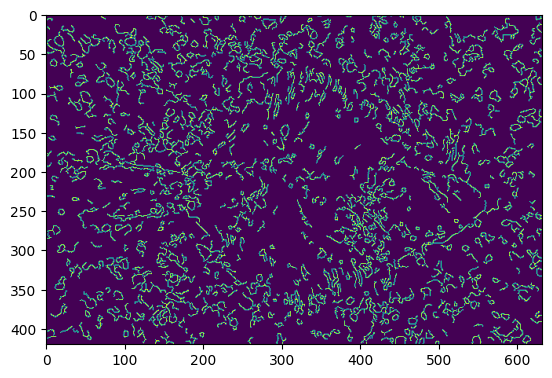

In [56]:
import cv2
#img1 = mpimg.imread('./CAMO-V.1.0/Images/Test/camourflage_00012.jpg')
img1 = Image.open('./CAMO-V.1.0/Images/Test/camourflage_00012.jpg').convert('L')
img1 = np.array(img1)
plt.imshow(img1)
img_blur = cv2.GaussianBlur(img1, (5, 5), 0)
edges = cv2.Canny(img_blur, threshold1=100, threshold2=200)
plt.imshow(edges)

In [57]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

# # load images
# img1 = mpimg.imread('./CAMO-V.1.0/Canny_Filtered_images/camourflage_00001.jpg')
# #img2 = mpimg.imread('./CAMO-V.1.0/new_masks/camourflage_00001.jpg')
# img1 = Image.open('./CAMO-V.1.0/Canny_Filtered_images/camourflage_00001.jpg').convert('L')

#make prediction
transform = transforms.Compose([transforms.Resize((150,150)), transforms.ToTensor()])

#to PIL image
print(np.shape(img1))
img1 = Image.fromarray(img1.astype('uint8'), mode='L')

i = transform(img1)
i = i.unsqueeze(0)
i= i.to('cuda')
print(np.shape(i))

pred = model(i)

temp = pred.detach()
img = temp.cpu()
pred = img


# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# display images on subplots
ax1.imshow(img1)
ax1.set_title('CAMO IMAGE')
ax1.axis('off')

ax2.imshow(pred.squeeze())
ax2.set_title('CAMO OBJ EDGE')
ax2.axis('off')

# show the plot
plt.show()

(420, 632)
torch.Size([1, 1, 150, 150])


RuntimeError: cuDNN error: CUDNN_STATUS_MAPPING_ERROR

In [ ]:
# import torch.nn as nn

# class Generator(nn.Module):
#     def __init__(self, input_shape):
#         super(Generator, self).__init__()

#         # Encoder
#         self.conv1 = nn.Conv2d(in_channels=input_shape[0], out_channels=64, kernel_size=3, stride=2, padding=1)
#         self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=2, padding=1)
#         self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=2, padding=1)
#         self.conv4 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=2, padding=1)
#         self.dropout = nn.Dropout2d(p=0.5)
        
#         # Decoder
#         self.deconv1 = nn.ConvTranspose2d(in_channels=512, out_channels=256, kernel_size=3, stride=2, padding=1, output_padding=1)
#         self.deconv2 = nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=3, stride=2, padding=1, output_padding=1)
#         self.deconv3 = nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=3, stride=2, padding=1, output_padding=1)
#         self.deconv4 = nn.ConvTranspose2d(in_channels=64, out_channels=1, kernel_size=3, stride=2, padding=1, output_padding=1)
#         self.conv5 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=1, stride=1)

#     def forward(self, x):
#         # Encoder
#         x = nn.functional.relu(self.conv1(x))
#         x = nn.functional.relu(self.conv2(x))
#         x = nn.functional.relu(self.conv3(x))
#         x = nn.functional.relu(self.conv4(x))
#         x = self.dropout(x)

#         # Decoder
#         x = nn.functional.relu(self.deconv1(x))
#         x = nn.functional.relu(self.deconv2(x))
#         x = nn.functional.relu(self.deconv3(x))
#         x = nn.functional.sigmoid(self.deconv4(x))
#         x = self.conv5(x)

#         return x


In [197]:
print("len out mask: " , np.shape(output_mask))
print("len mask: ", np.shape(mask))

len out mask:  torch.Size([5, 5])
len mask:  torch.Size([5, 1, 150, 150])


In [ ]:

# # Convert the prediction to a binary mask
# mask = prediction > 0.5

# # Save the mask as an image
# mask = transforms.ToPILImage()(mask.float())
# mask.save('output_mask.png')